<a href="https://colab.research.google.com/github/dhiren11lab/NLP/blob/main/2303A51457(as4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv("dataset.csv")
texts = df["text"].tolist()
labels = df["label"].tolist()

print(df.head())

                                                text   label
0                    The team won the football match  sports
1            He scored a century in the cricket game  sports
2             The basketball tournament was exciting  sports
3           The player trained hard for the Olympics  sports
4  Fans celebrated the victory of their favorite ...  sports


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

max_features_list = [5, 10, 20]  # for small dataset
results = []


In [ ]:
for max_feat in max_features_list:
    print(f"\n=== Using max_features={max_feat} ===")

    # Vectorizer
    vectorizer = TfidfVectorizer(stop_words="english", max_features=max_feat)
    X_vec = vectorizer.fit_transform(texts)

    for name, model in models.items():
        print(f"Training {name}...")

        start = time.time()
        scores = cross_val_score(model, X_vec, labels, cv=5, scoring="accuracy")
        end = time.time()

        avg_acc = scores.mean()
        train_time = end - start

        results.append([name, max_feat, avg_acc, train_time])



=== Using max_features=5 ===
Training Logistic Regression...
Training Naive Bayes...
Training Random Forest...

=== Using max_features=10 ===
Training Logistic Regression...
Training Naive Bayes...
Training Random Forest...

=== Using max_features=20 ===
Training Logistic Regression...
Training Naive Bayes...
Training Random Forest...


In [ ]:
df_results = pd.DataFrame(results, columns=["Model", "Max Features", "Accuracy", "Training Time"])
print("\n=== Results Table ===")
print(df_results)


=== Results Table ===
                 Model  Max Features  Accuracy  Training Time
0  Logistic Regression             5  0.466667       0.037559
1          Naive Bayes             5  0.466667       0.018124
2        Random Forest             5  0.533333       0.770058
3  Logistic Regression            10  0.466667       0.028324
4          Naive Bayes            10  0.533333       0.017097
5        Random Forest            10  0.533333       0.751980
6  Logistic Regression            20  0.466667       0.026503
7          Naive Bayes            20  0.533333       0.016775
8        Random Forest            20  0.400000       0.768634


In [ ]:
best_row = df_results.loc[df_results["Accuracy"].idxmax()]
best_model_name = best_row["Model"]
best_max_feat = best_row["Max Features"]

print(f"\nBest Model: {best_model_name} with max_features={best_max_feat}")


Best Model: Random Forest with max_features=5


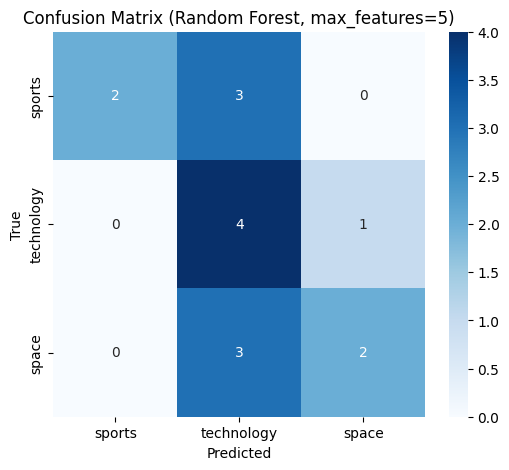

In [ ]:
vectorizer = TfidfVectorizer(stop_words="english", max_features=int(best_max_feat))
X_vec = vectorizer.fit_transform(texts)
best_model = models[best_model_name]

y_pred = cross_val_predict(best_model, X_vec, labels, cv=5)
cm = confusion_matrix(labels, y_pred, labels=["sports", "technology", "space"])

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["sports", "technology", "space"],
            yticklabels=["sports", "technology", "space"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Confusion Matrix ({best_model_name}, max_features={best_max_feat})")
plt.show()

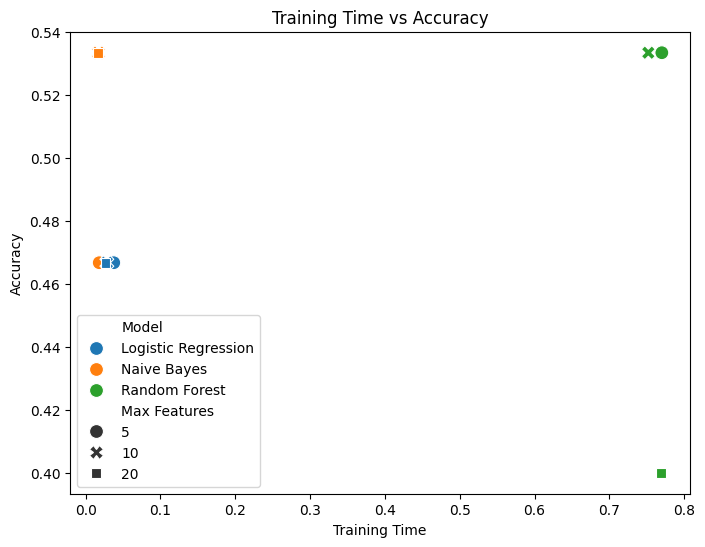

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Training Time", y="Accuracy", hue="Model", style="Max Features", data=df_results, s=100)
plt.title("Training Time vs Accuracy")
plt.show()
